In [56]:
%reload_ext autoreload

import os,sys
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('..')


In [7]:
from src.loader import NewsDataLoader
import src.countries_region as countries_region 
from src.config import cfg
import src.utils as utils


In [9]:
news_data_loader = NewsDataLoader(cfg.path)
news = news_data_loader.get_news()
traffic = news_data_loader.get_traffic()
domain = news_data_loader.get_domain_location()
df = pd.read_csv(news)
traffic_df = pd.read_csv(traffic)
domain_df = pd.read_csv(domain)

In [11]:
df.shape
df.info()
traffic_df.info()
domain_df.info()
df.isna().sum()
traffic_df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
dtypes: int64(1), object(12)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  --

GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64

In [18]:
df.dropna(subset=['category'], inplace=True)

domain_df.dropna(subset=['Country'], inplace=True)

# remove duplicates
df = df.loc[~df.duplicated(subset=['article_id','url', 'published_at'])].reset_index(drop=True)

# drop rows with unnesessary columns
df = df[['article_id', 
# 'source_id', 
'source_name', 
# 'author', 
'title',
'description', 'url', 
# 'url_to_image', 
'published_at', 'content',
'category', 'article', 'title_sentiment']]
df.columns

Index(['article_id', 'source_name', 'title', 'description', 'url',
       'published_at', 'content', 'category', 'article', 'title_sentiment'],
      dtype='object')

In [20]:
#top and bottom ten websites with largest count of news article
article_counts = df['source_name'].value_counts()

top_10_websites = article_counts.head(10)

bottom_10_websites = article_counts.tail(10)
print("Top 10 websites with the largest count of news articles:")
print(top_10_websites)
print("\n botto, 10 websites with the largest count of news articles:")
print(bottom_10_websites)

Top 10 websites with the largest count of news articles:
source_name
ETF Daily News        15035
The Times of India     7006
GlobeNewswire          5040
Globalsecurity.org     2904
Forbes                 2574
BBC News               2018
Business Insider       1978
ABC News               1946
The Punch              1748
Al Jazeera English     1587
Name: count, dtype: int64

 botto, 10 websites with the largest count of news articles:
source_name
CNA                            671
Time                           579
Android Central                515
Gizmodo.com                    380
ReadWrite                      315
Euronews                       286
Wired                          256
CNN                            256
The Verge                      205
AllAfrica - Top Africa News     18
Name: count, dtype: int64


In [39]:
# webstes with highest and lowest traffic
website_traffic_counts = traffic_df.groupby('Domain')['GlobalRank'].max()

top_ten_websites_traffic = website_traffic_counts.nsmallest(10)
bottom_ten_websites_traffic = website_traffic_counts.nlargest(10)

# Print top ten websites with highest traffic
print("Top Ten Websites with the Highest Traffic:")
print(top_ten_websites_traffic)

# Print bottom ten websites with lowest traffic
print("\nBottom Ten Websites with the Lowest Traffic:")
print(bottom_ten_websites_traffic)


Top Ten Websites with the Highest Traffic:
Domain
google.com               1
facebook.com             2
youtube.com              3
twitter.com              4
instagram.com            5
linkedin.com             6
apple.com                7
microsoft.com            8
googletagmanager.com     9
wikipedia.org           10
Name: GlobalRank, dtype: int64

Bottom Ten Websites with the Lowest Traffic:
Domain
toyotamusicfactory.com    1000000
soderhomes.com             999999
pinkwater.com              999998
mt-lock.com                999997
kireie.com                 999996
keith-baker.com            999995
irishcycle.com             999994
hmag.com                   999993
exploring-africa.com       999992
eiretrip.com               999991
Name: GlobalRank, dtype: int64


In [42]:
# Top and Bottom ten countries with the highest number of news media organizations

country_domain_counts = domain_df['Country'].value_counts()

top_ten_countries = country_domain_counts.head(10)
bottom_ten_countries = country_domain_counts.tail(10)

print("Top Ten Countries with the Highest Number of News Media Organizations:")
print(top_ten_countries)

print("\nBottom Ten Countries with the Lowest Number of News Media Organizations:")
print(bottom_ten_countries)


Top Ten Countries with the Highest Number of News Media Organizations:
Country
United States     14111
United Kingdom     1950
Italy              1810
France             1041
Russia             1024
Canada              887
Germany             884
China               780
Turkey              725
India               686
Name: count, dtype: int64

Bottom Ten Countries with the Lowest Number of News Media Organizations:
Country
Greenland         1
Guernsey          1
Isle of Man       1
Cook Islands      1
Guinea-Bissau     1
Micronesia        1
Aruba             1
American Samoa    1
Guadeloupe        1
Saint Helena      1
Name: count, dtype: int64


In [46]:
# Countries that have many articles written about them
category = df['category'].value_counts()
countries = domain_df['Country'].unique()
country_categories = category[category.index.isin(countries)]
print("Top 10 countries that have many articles written about them\n")
print(country_categories.head(10))
print("\nBottom ten countries that have many articles written about them10\n")
print(country_categories.tail(10))

Top 10 countries that have many articles written about them

category
Canada            1902
India             1000
Australia          841
United Kingdom     724
Ukraine            556
Mexico             537
Nigeria            469
United States      469
Germany            434
Hong Kong          419
Name: count, dtype: int64

Bottom ten countries that have many articles written about them10

category
Turkmenistan    8
Montserrat      7
Bhutan          7
Eritrea         6
San Marino      4
Gambia          4
Andorra         3
Burundi         3
Honduras        3
Martinique      2
Name: count, dtype: int64


In [51]:
# Top and bottom 10 Websites that reported about Africa
region = countries_region.get_region()

df['Region'] = df['category'].map(region)

top_ten_africa = df[df['Region'] == 'Africa']['source_name'].value_counts().head(10)
bottom_ten_africa = df[df['Region'] == 'Africa']['source_name'].value_counts().tail(10)

# Top and bottom 10 Websites that reported  about Euroe

top_ten_europe = df[df['Region'] == 'Europe']['source_name'].value_counts().head(10)
bottom_ten_europe = df[df['Region'] == 'Europe']['source_name'].value_counts().tail(10)

# Top 10 Websites that reported  about Asia

top_ten_asia = df[df['Region'] == 'Asia']['source_name'].value_counts().head(10)
bottom_ten_asia = df[df['Region'] == 'Asia']['source_name'].value_counts().tail(10)

# Top and bottom  that reported (the news content) about North America

top_ten_US = df[df['Region'] == 'America']['source_name'].value_counts().head(10)
bottom_ten_US = df[df['Region'] == 'America']['source_name'].value_counts().tail(10)

# Top and bottom  that reported (the news content) about China

top_ten_china = df[df['Region'] == 'China']['source_name'].value_counts().head(10)
bottom_ten_china = df[df['Region'] == 'China']['source_name'].value_counts().tail(10)

In [52]:
print("Top 10 websites that reported news content about Africa:\n")
print(top_ten_africa)
print("bottom 10 websites that reported news content about Africa:\n")
print(bottom_ten_africa)

print("Top 10 websites that reported news content about europe:\n")
print(top_ten_europe)
print("bottom 10 websites that reported news content about europe:\n")
print(bottom_ten_europe)

print("Top 10 websites that reported news content about US:\n")
print(top_ten_US)
print("bottom 10 websites that reported news content about US:\n")
print(bottom_ten_US)

print("Top 10 websites that reported news content about asia:\n")
print(top_ten_asia)
print("bottom 10 websites that reported news content about asia:\n")
print(bottom_ten_asia)

print("Top 10 websites that reported news content about china:\n")
print(top_ten_china)
print("bottom 10 websites that reported news content about china:\n")
print(bottom_ten_china)

Top 10 websites that reported news content about Africa:

source_name
The Punch                       835
Marketscreener.com              242
The Times of India              196
Globalsecurity.org              189
ETF Daily News                  182
BBC News                        138
RT                              129
Al Jazeera English              116
ABC News                        105
International Business Times     97
Name: count, dtype: int64
bottom 10 websites that reported news content about Africa:

source_name
Business Insider      21
Time                  20
The Indian Express    15
Boing Boing            8
Gizmodo.com            5
Digital Trends         3
Android Central        2
Wired                  2
ReadWrite              2
The Verge              1
Name: count, dtype: int64
Top 10 websites that reported news content about europe:

source_name
ETF Daily News        934
GlobeNewswire         476
Globalsecurity.org    465
RT                    246
The Times of India   

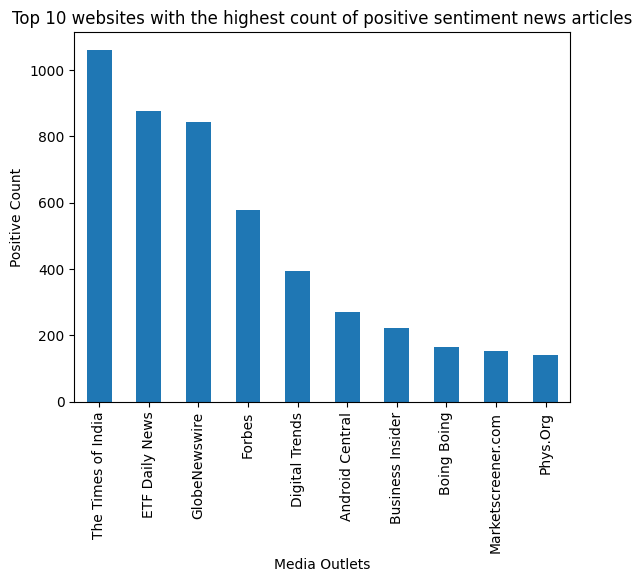

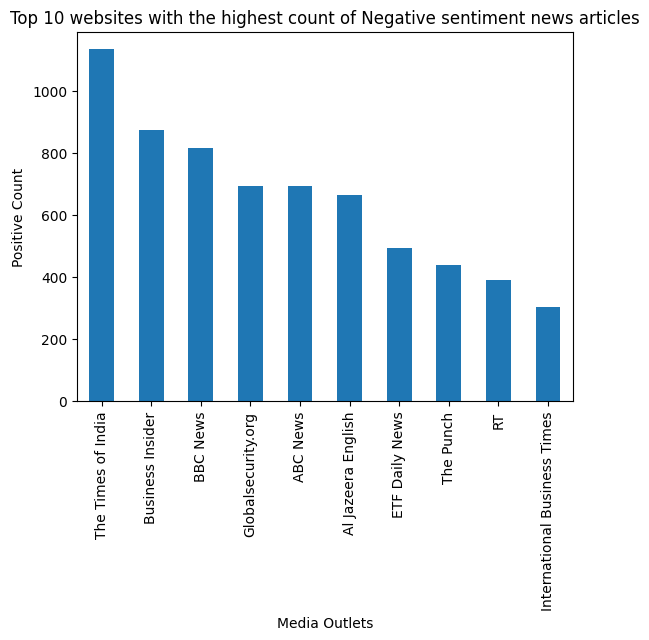

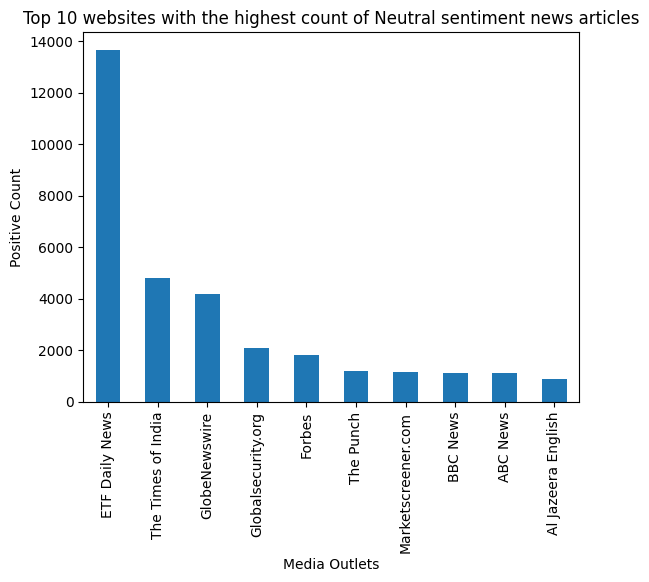

In [54]:
#Websites with the highest count of positive sentiment news articles
positive = df[df['title_sentiment'] == 'Positive']['source_name'].value_counts().head(10)

#websites with the highest count of neutral sentiment news articles
neutral = df[df['title_sentiment'] == 'Neutral']['source_name'].value_counts().head(10)

#websites with the highest count of negative sentiment news articles
negative = df[df['title_sentiment'] == 'Negative']['source_name'].value_counts().head(10)

# plot the top 10 websites with the highest count of positive sentiment news articles
positive.plot(kind='bar')
plt.xlabel('Media Outlets')
plt.ylabel('Positive Count')
plt.title('Top 10 websites with the highest count of positive sentiment news articles')
plt.show()


neutral.plot(kind='bar')
plt.xlabel('Media Outlets')
plt.ylabel('Positive Count')
plt.title('Top 10 websites with the highest count of Neutral sentiment news articles')
plt.show()


negative.plot(kind='bar')
plt.xlabel('Media Outlets')
plt.ylabel('Positive Count')
plt.title('Top 10 websites with the highest count of Negative sentiment news articles')
plt.show()

    

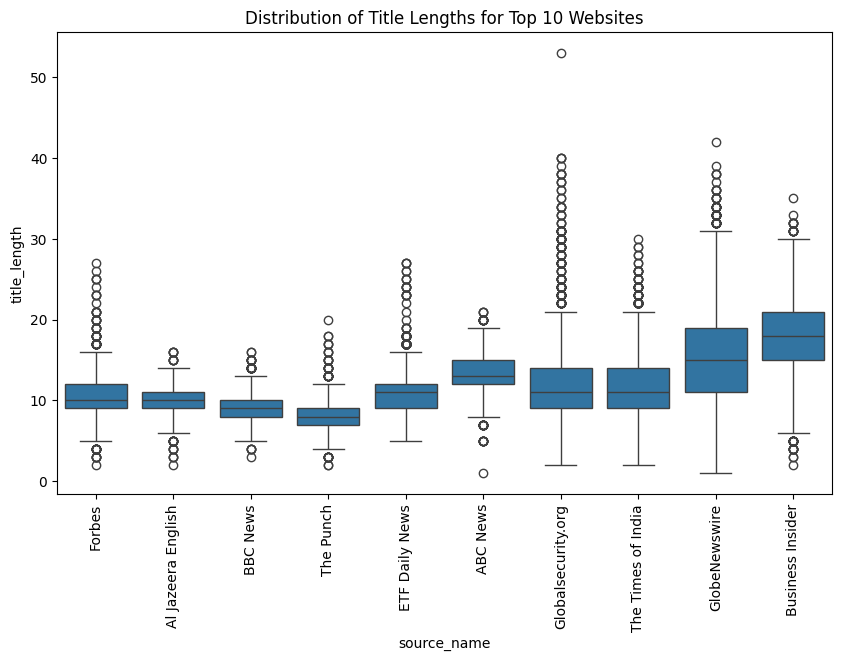

In [57]:
# calculate the sentiment score of the title, median and mode sentiment
df['sentiment_score'] = df['title'].apply(utils.get_sentiment_score)
average_sentiment = df.groupby('source_name')['sentiment_score'].mean()  
median_sentiment = df.groupby('source_name')['sentiment_score'].median()  

#  Check the distribution among sites
df['title_length'] = df['title'].apply(utils.get_number_of_words)

# How similar are the raw message lengths across sites?
website_title_counts = df.groupby('source_name')['title_length'].count()

# Get the top 10 websites with the highest number of articles
large_websites = website_title_counts.nlargest(10).index

# Filter the data to include only the top websites
websites_df = df[df['source_name'].isin(large_websites)]

# Plot the distribution of message lengths for each website
plt.figure(figsize=(10, 6))
sns.boxplot(x='source_name', y='title_length', data=websites_df)
plt.xticks(rotation=90)
plt.title('Distribution of Title Lengths for Top 10 Websites')
plt.show()